In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.fftpack import fft, fftfreq

import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal #periodicas
from FReconstrucciondeseñalesapartirdemuestras import h
from FTransformaciones_tf_de_una_señal_no_periodica import EspecCont #no periodicas
from FMCD_y_MCM import mcd, mcm, mcd_3

importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb
importing Jupyter notebook from FReconstrucciondeseñalesapartirdemuestras.ipynb
importing Jupyter notebook from FTransformaciones_tf_de_una_señal_no_periodica.ipynb


### APARTADO A

In [3]:
N, A = 10, 10
n = np.arange(N)
Fs=1
x = A*n/(10*Fs)

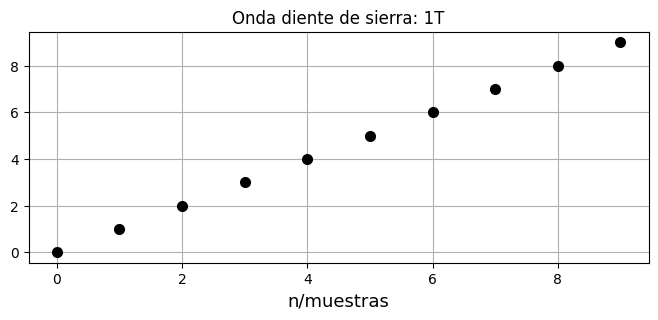

In [4]:
plt.figure(figsize=(8,3))
plt.plot(n,x,'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.title('Onda diente de sierra: 1T')
plt.grid(True)
plt.show()

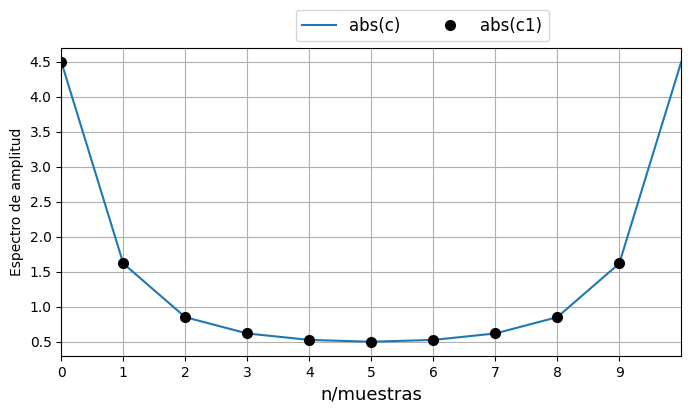

In [5]:
c1 = Espectro(x)
pa1 = np.arange (N)
N1, Fs = 800, 100
k1 = np.arange(N1)
c1a = np.ndarray(N1,dtype=complex) # defino la longitud del vector c
s1 = k1
for q in k1:
    if q==0:
        c1a[q] = 1/10*(1+2+3+4+5+6+7+8+9)
    else:
        c1a[q] = (1/10)*(np.exp(-1j*2*np.pi*q/10)+2*np.exp(2*-1j*2*np.pi*q/10)+3*np.exp(3*-1j*2*np.pi*q/10)+4*np.exp(4*-1j*2*np.pi*q/10)+5*np.exp(5*-1j*2*np.pi*q/10)+6*np.exp(6*-1j*2*np.pi*q/10)+7*np.exp(7*-1j*2*np.pi*q/10)+8*np.exp(8*-1j*2*np.pi*q/10)+9*np.exp(9*-1j*2*np.pi*q/10)) 
        # reemplazo k por s en la ecuación


plt.figure(figsize=(8,4))
plt.plot(s1, abs(c1a))
plt.plot(pa1,abs(c1),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.xlim(0,10)
plt.ylabel('Espectro de amplitud')
plt.legend(('abs(c)','abs(c1)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks (n)
plt.grid(True)
plt.show()

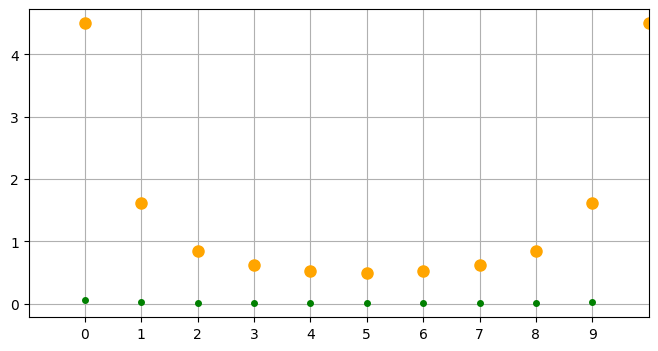

In [6]:
X1 = fft (x)/N1
frq1 = fftfreq (N1, 1/Fs)
p1 = np.arange (len(X1))

plt.figure(figsize=(8,4))
plt.plot (figsize = (10,4))
plt.plot (k1,abs (c1a),"o" , color = "orange",ms=8)
plt.plot (p1,abs (X1),"o",color = "green", ms=4)
plt.xlim (-1,10)
plt.xticks (n)
plt.grid (True)
plt.show()

### Apartado B

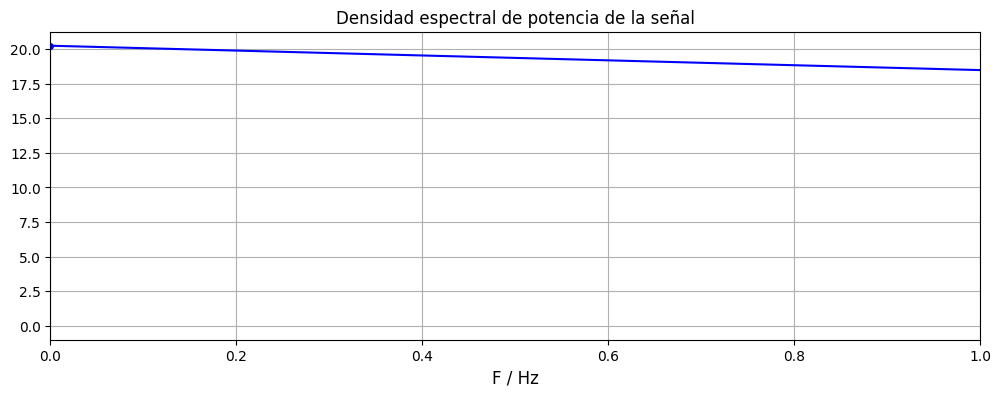

In [7]:
c1 = Espectro(x) #Espectro de la señal muestreada
p1 = np.arange(N) #Contador en el dominio de la frecuencia


C1 = c1*np.conjugate(c1) 
#El espectro por su conjugado para sacar la densidad espectral de potencia


plt.figure(figsize=(12,4))
plt.plot(p1*(Fs/N),abs(C1), '.-',color='b',ms=8)


plt.vlines(Fs/2,0,20, linestyles='dashed',color='r')
plt.xlabel('F / Hz', fontsize=12)
plt.xlim (0,1)
plt.title('Densidad espectral de potencia de la señal')
plt.grid(True)
plt.show()

### Apartado C

In [8]:
# Para representar la señal x(n) en términos de c(k) uso la Ecuación de síntesis. 

k = np.arange(0,10,dtype=complex)

c2 = np.piecewise(k,[k==0],

        [lambda k: 1/10*(1+2+3+4+5+6+7+8+9) , lambda k: (1/10)*(np.exp(-1j*2*np.pi*k/10)+2*np.exp(2*-1j*2*np.pi*k/10)+3*np.exp(3*-1j*2*np.pi*k/10)+4*np.exp(4*-1j*2*np.pi*k/10)+5*np.exp(5*-1j*2*np.pi*k/10)+6*np.exp(6*-1j*2*np.pi*k/10)+7*np.exp(7*-1j*2*np.pi*k/10)+8*np.exp(8*-1j*2*np.pi*k/10)+9*np.exp(9*-1j*2*np.pi*k/10)) ])



n2 = np.arange(3*N)

xrec2 = np.zeros(len(n2),dtype=complex)

s2 = 0

for i in np.arange(0,N):

    s2 = s2 + c2[i] * np.exp(1j*2*np.pi*i*n2/N)

xrec2 = s2

### Apartado D

/Users/mateo/Desktop/Copia de PDSB 1/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

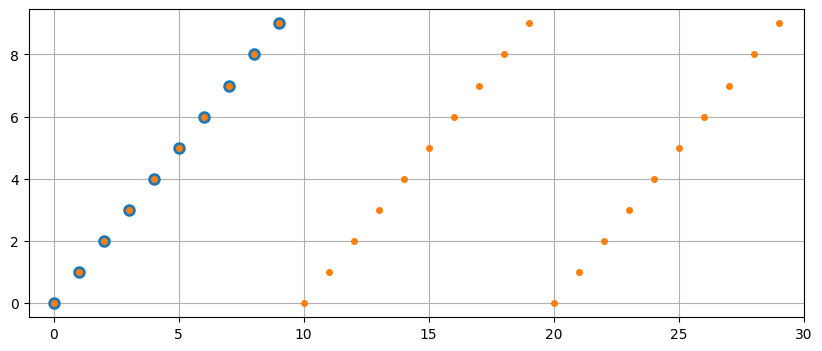

In [9]:
plt.figure (figsize=(10,4))
plt.plot (n,x,"o",ms=8)
plt.plot (n2,xrec2,"o",ms=4)
plt.xlim (-1,30)
plt.grid (True)
plt.show

- - -

# MODO PRO

In [10]:
N = 10
c = np.zeros (N,dtype=complex)
k = np.arange (N)
for i in k:
    if i==0:
        c[i] = (N-1)/2
    else:
        c[i] = 1/(-1+np.exp(-1j*2*np.pi*i/N))

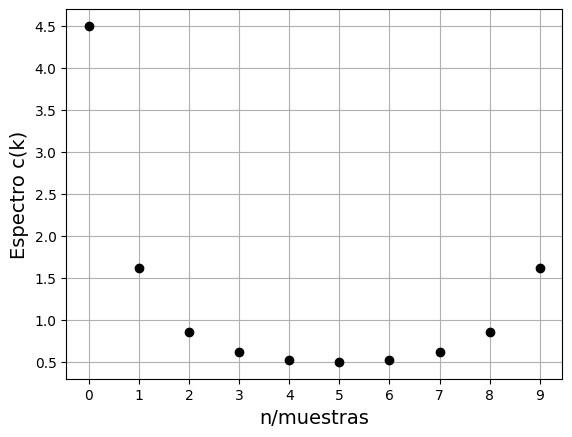

In [11]:
plt.plot (k,abs(c),"ok")
plt.xticks (np.arange(N))
plt.xlabel ("n/muestras",fontsize=14)
plt.ylabel ("Espectro c(k)",fontsize=14)
plt.grid (True)
plt.show()

In [12]:
c

array([ 4.5+0.00000000e+00j, -0.5+1.53884177e+00j, -0.5+6.88190960e-01j,
       -0.5+3.63271264e-01j, -0.5+1.62459848e-01j, -0.5+3.06161700e-17j,
       -0.5-1.62459848e-01j, -0.5-3.63271264e-01j, -0.5-6.88190960e-01j,
       -0.5-1.53884177e+00j])

In [13]:
#Densidad espectral de Potencia

C = c*np.conjugate(c)

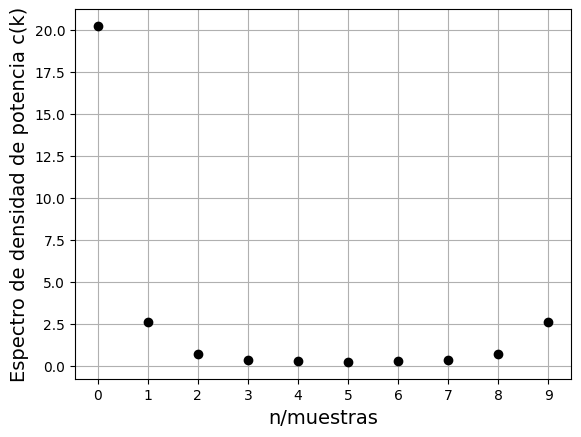

In [14]:
plt.plot (k,abs(C),"ok")
plt.xticks (np.arange(N))
plt.xlabel ("n/muestras",fontsize=14)
plt.ylabel ("Espectro de densidad de potencia c(k)",fontsize=14)
plt.grid (True)
plt.show()

In [15]:
n = np.arange (30)
x = np.zeros (len(n),dtype=complex)
s2 = 0
for i in np.arange (0,N):
    s2 = s2 + c[i] * np.exp (1j*2*np.pi*i*n/N)
x = s2

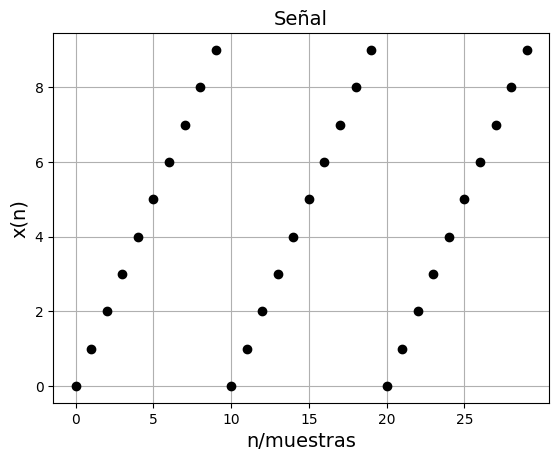

In [16]:
plt.plot (n,abs(x),"ok")
plt.title ("Señal",fontsize=14)
plt.xticks (np.arange(0,3*N,5))
plt.xlabel ("n/muestras",fontsize=14)
plt.ylabel ("x(n)",fontsize=14)
plt.grid (True)
plt.show()

- - -